# Data Preprocessing Assignment
> **Due Date**: 12 Maret 2025  

## Instruksi  
- Selesaikan semua latihan dalam notebook ini  
- Biarkan semua sel kode yang ada dan tambahkan solusi Kalian di area yang telah ditentukan  
- Tambahkan comment pada kode Kalian untuk menjelaskan kode tersebut
- Kalian boleh menggunakan sumber eksternal, tetapi pekerjaan harus merupakan hasil sendiri  
- Jika ada pertanyaan, hubungi panitia

## Setup
Run this cell to import required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Visualisasi
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Part 1: Handling Missing Values

### Exercise 1.1: Identifying Missing Values
Kita akan memulai dengan dataset sederhana yang berisi informasi tentang karyawan.

In [2]:
# Load the dataset
employee_data = {
    'Employee_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'Name': ['Ghaza', 'Irul', 'Hilmi', 'Yasin', 'Fajar', 'Pieter', 'Toni', 'Radit', 'Afe', 'Rafly'],
    'Department': ['IT', 'HR', 'Finance', 'IT', None, 'Finance', 'HR', None, 'IT', 'Finance'],
    'Salary': [5000, None, 4500, 5500, 4000, None, 4200, 5100, None, 4800],
    'Age': [28, 35, None, 42, 31, 45, None, 36, 29, None],
    'Experience': [3, 7, 5, None, 2, 10, 4, None, 6, 8]
}

employees = pd.DataFrame(employee_data)
print("Employee DataFrame:")
display(employees)

Employee DataFrame:


,Employee_ID,Name,Department,Salary,Age,Experience
0,101,Ghaza,IT,5000.0,28.0,3.0
1,102,Irul,HR,NaN,35.0,7.0
2,103,Hilmi,Finance,4500.0,NaN,5.0
3,104,Yasin,IT,5500.0,42.0,NaN
4,105,Fajar,None,4000.0,31.0,2.0
5,106,Pieter,Finance,NaN,45.0,10.0
6,107,Toni,HR,4200.0,NaN,4.0
7,108,Radit,None,5100.0,36.0,NaN
8,109,Afe,IT,NaN,29.0,6.0
9,110,Rafly,Finance,4800.0,NaN,8.0


**Tasks:**
1. Temukan jumlah total nilai yang hilang di seluruh dataset.  
2. Identifikasi kolom mana yang memiliki nilai hilang terbanyak.  
3. Hitung persentase nilai yang hilang pada kolom 'Age'.  
4. Buat visualisasi yang menunjukkan jumlah nilai hilang untuk setiap kolom.

In [3]:
# 1. Temukan jumlah total nilai yang hilang di seluruh dataset.
employees.isnull().sum().sum()

10

In [4]:
#2. Identifikasi kolom mana yang memiliki nilai hilang terbanyak.
employees.isnull().sum().sort_values(ascending=False)

Salary         3
Age            3
Department     2
Experience     2
Employee_ID    0
Name           0
dtype: int64

In [5]:
#3. Hitung persentase nilai yang hilang pada kolom 'Age'
total_mv_age = employees['Age'].isna().sum()
total_age = employees.shape[0]
mv_percentage = 100 * total_mv_age/total_age
print(f'{mv_percentage} %')

30.0 %


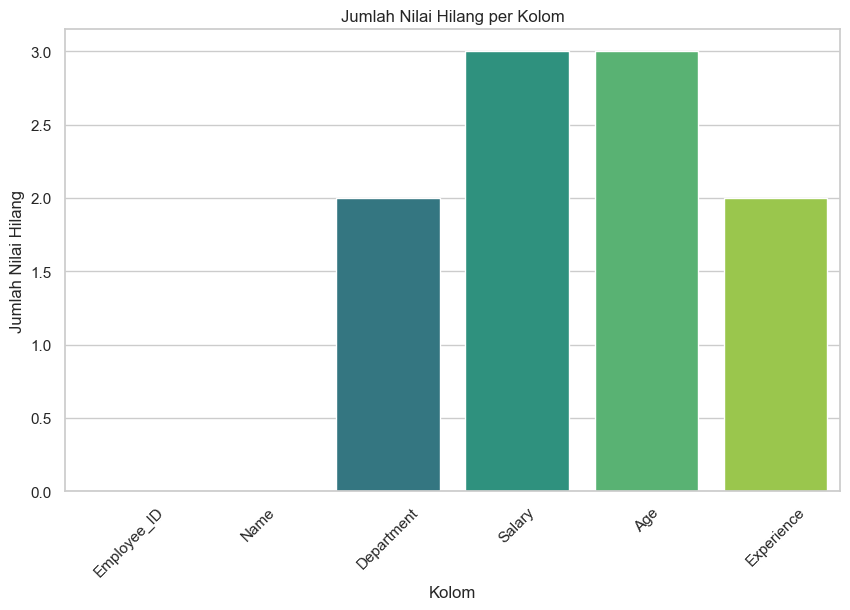

In [6]:
#4. Buat visualisasi yang menunjukkan jumlah nilai hilang untuk setiap kolom.
employees.isna().sum()

missing_values = employees.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Jumlah Nilai Hilang per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Jumlah Nilai Hilang')
plt.xticks(rotation=45) 
plt.show()


### Exercise 1.2: Handling Missing Values
Sekarang, mari tangani nilai yang hilang menggunakan berbagai teknik.

**Tasks:**
1. Lakukan Imputasi pada nilai null pada data 
2. Hitung statistik (mean, median, standar deviasi) untuk kolom numerik sebelum dan sesudah imputasi.  
3. Buat visualisasi yang membandingkan distribusi nilai sebelum dan sesudah imputasi untuk setiap kolom numerik.  
4. Tulis analisis singkat (2-3 kalimat) yang menjelaskan apakah metode imputasi berhasil mempertahankan distribusi data yang mendasarinya.

In [7]:
# 2. Hitung statistik (mean, median, standar deviasi) untuk kolom numerik sebelum dan sesudah imputasi.  

'''
[Your analysis here]
'''

# Distribusi sebelum imputasi
mean_before = employees.iloc[:, 3:6].mean()
median_before = employees.iloc[:, 3:6].median()
std_before = np.std(employees.iloc[:, 3:6], ddof=1)
print(f'Statistik sebelum imputasi')
print(f'\nMean :\n{mean_before}')
print(f'\nMedian :\n{median_before}')
print(f'\nStandard Deviasi :\n{std_before}')

Statistik sebelum imputasi

Mean :
Salary        4728.571429
Age             35.142857
Experience       5.625000
dtype: float64

Median :
Salary        4800.0
Age             35.0
Experience       5.5
dtype: float64

Standard Deviasi :
Salary        528.249580
Age             6.466028
Experience      2.669270
dtype: float64


In [8]:
# 1. Lakukan Imputasi pada nilai null pada data 
mean_age = np.round(employees['Age'].mean()).astype(int)
employees.fillna({'Department' : employees['Department'].mode()[0],
                  'Salary' : employees['Salary'].mean(),
                  'Age' : mean_age,
                  'Experience' : employees['Experience'].median()}, inplace=True)
employees

,Employee_ID,Name,Department,Salary,Age,Experience
0,101,Ghaza,IT,5000.000000,28.0,3.0
1,102,Irul,HR,4728.571429,35.0,7.0
2,103,Hilmi,Finance,4500.000000,35.0,5.0
3,104,Yasin,IT,5500.000000,42.0,5.5
4,105,Fajar,Finance,4000.000000,31.0,2.0
5,106,Pieter,Finance,4728.571429,45.0,10.0
6,107,Toni,HR,4200.000000,35.0,4.0
7,108,Radit,Finance,5100.000000,36.0,5.5
8,109,Afe,IT,4728.571429,29.0,6.0
9,110,Rafly,Finance,4800.000000,35.0,8.0


In [9]:
# 2. Hitung statistik (mean, median, standar deviasi) untuk kolom numerik sebelum dan sesudah imputasi.  

# Distribusi sesudah imputasi
mean_after = employees.iloc[:, 3:6].mean()
median_after = employees.iloc[:, 3:6].median()
std_after = np.std(employees.iloc[:, 3:6], ddof=1)
print(f'Statistik sesudah imputasi')
print(f'\nMean :\n{mean_after}')
print(f'\nMedian :\n{median_after}')
print(f'\nStandard Deviasi :\n{std_after}')

Statistik sesudah imputasi

Mean :
Salary        4728.571429
Age             35.100000
Experience       5.600000
dtype: float64

Median :
Salary        4728.571429
Age             35.000000
Experience       5.500000
dtype: float64

Standard Deviasi :
Salary        431.313976
Age             5.279941
Experience      2.354664
dtype: float64


In [10]:

data_before = {
    "Atribut": ["Salary", "Age", "Experience"],
    "Mean": mean_before,
    "Median": median_before,
    "Std Dev": std_before
}

df_before = pd.DataFrame(data_before).set_index("Atribut")
df_before

,Mean,Median,Std Dev
Atribut,,,
Salary,4728.571429,4800.0,528.249580
Age,35.142857,35.0,6.466028
Experience,5.625000,5.5,2.669270


In [11]:
import matplotlib.pyplot as plt

data_after = {
    "Atribut": ["Salary", "Age", "Experience"],
    "Mean": mean_after,
    "Median": median_after,
    "Std Dev": std_after
}

df_after = pd.DataFrame(data_after).set_index("Atribut")
df_after


,Mean,Median,Std Dev
Atribut,,,
Salary,4728.571429,4728.571429,431.313976
Age,35.100000,35.000000,5.279941
Experience,5.600000,5.500000,2.354664


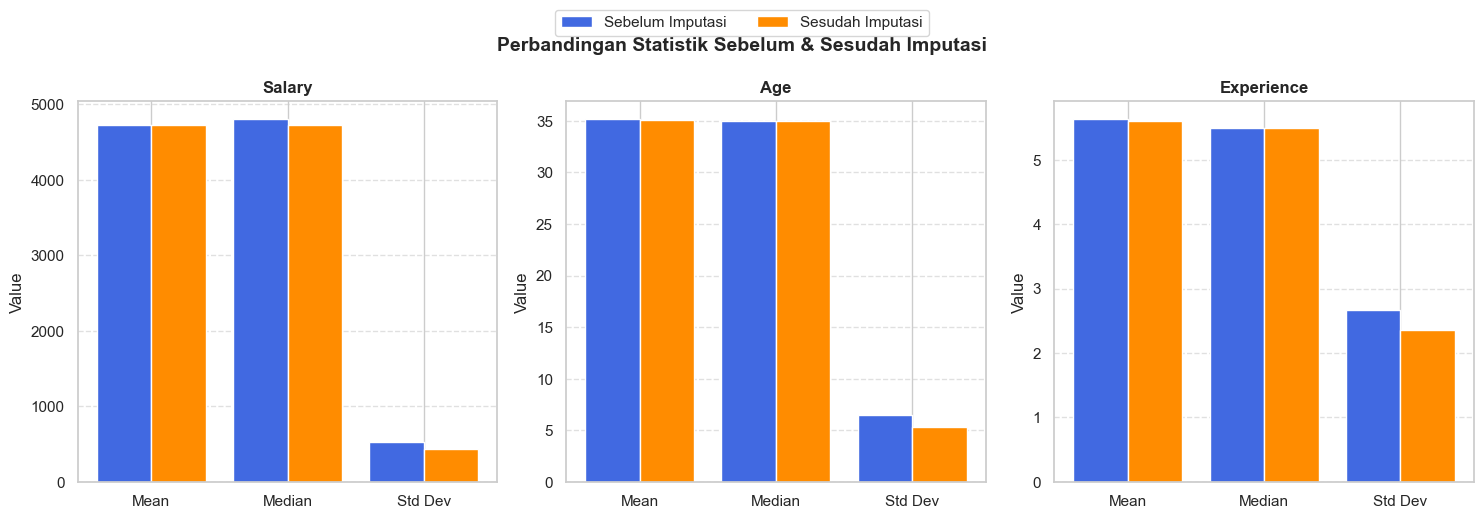

In [12]:
# 3. Buat visualisasi yang membandingkan distribusi nilai sebelum dan sesudah imputasi untuk setiap kolom numerik.  
# Statistik yang dibandingkan
stats = ["Mean", "Median", "Std Dev"]
colors = ['royalblue', 'darkorange']  # Warna untuk sebelum & sesudah imputasi

# Buat figure dengan 3 subplot (1 untuk setiap atribut)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

for i, atribut in enumerate(df_before.index):  # Loop untuk setiap atribut
    ax = axes[i]
    width = 0.4  # Lebar batang
    
    # Posisi sumbu X
    x = np.arange(len(stats))  
    
    # Plot batang untuk sebelum dan sesudah imputasi
    ax.bar(x - width/2, df_before.loc[atribut, stats], width, label="Sebelum Imputasi", color=colors[0])
    ax.bar(x + width/2, df_after.loc[atribut, stats], width, label="Sesudah Imputasi", color=colors[1])
    
    # Konfigurasi tampilan
    ax.set_title(atribut, fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(stats, rotation=0)
    ax.set_ylabel("Value")
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Tambahkan legenda di luar subplot
fig.legend(["Sebelum Imputasi", "Sesudah Imputasi"], loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

plt.suptitle("Perbandingan Statistik Sebelum & Sesudah Imputasi", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [13]:
# 4. Tulis analisis singkat (2-3 kalimat) yang menjelaskan apakah metode imputasi berhasil mempertahankan distribusi data yang mendasarinya.
'''
Untuk mengetahui apakah metode imputasi berhasil mempertahankan distribusi data, kita bisa melihat dari plot di atas:

Pada atribut 'Salary', mean memiliki nilai yang tetap dikarenakan oleh pengimputasian yang menggunakan mean. 
Mediannya sendiri memiliki penurunan dari sebelumnya dikarenakan oleh nilai yang diimputasi lebih kecil dibandingkan nilai mediannya.
Sama dengan median, standar deviasinya pun mengalami penurunan, ini memiliki terhadap variasi data yang berkurang dan ini terjadi 
karena nilai yang diimputasi terlalu mirip satu sama lain atau terlalu dekat dengan nilai rata-rata.

Pada atribut 'Age', mean mengalami sedikit penurunan setelah diimputasi dikarenakan oleh nilai yang diimputasi adalah 
nilai mean tetapi yang diambil adalah integernya atau bulatnya saja. Maka dari itu terdapat sedikit penurunan dari mean sebelumnya. 
Pada median, nilai median tetap sama karena nilai yang diimputasi adalah nilai mean bulatnya dan nilai mean bulatnya ini sama dengan mediannya. 
Pada standar deviasi, sama seperti median yang tidak berubah.

Pada atribut 'Experience', mean mengalami sedikit penurunan setelah diimputasi dikarenakan oleh nilai yang diimputasi adalah 
nilai median, yang mana nilai mediannya lebih rendah dari pada rata-rata sebelumnya sehingga mean setelah diimputasi menjadi 
berkurang. Median tetap sama karena nilai median tidak berubah. Pada standar deviasi, nilainya mengalami penurunan dikarenakan 
nilai yang diimputasi berada di dekat nilai rata-rata.
'''

"\nUntuk mengetahui apakah metode imputasi berhasil mempertahankan distribusi data, kita bisa melihat dari plot di atas:\n\nPada atribut 'Salary', mean memiliki nilai yang tetap dikarenakan oleh pengimputasian yang menggunakan mean. \nMediannya sendiri memiliki penurunan dari sebelumnya dikarenakan oleh nilai yang diimputasi lebih kecil dibandingkan nilai mediannya.\nSama dengan median, standar deviasinya pun mengalami penurunan, ini memiliki terhadap variasi data yang berkurang dan ini terjadi \nkarena nilai yang diimputasi terlalu mirip satu sama lain atau terlalu dekat dengan nilai rata-rata.\n\nPada atribut 'Age', mean mengalami sedikit penurunan setelah diimputasi dikarenakan oleh nilai yang diimputasi adalah \nnilai mean tetapi yang diambil adalah integernya atau bulatnya saja. Maka dari itu terdapat sedikit penurunan dari mean sebelumnya. \nPada median, nilai median tetap sama karena nilai yang diimputasi adalah nilai mean bulatnya dan nilai mean bulatnya ini sama dengan mediann

## Part 2: Dealing with Outliers

### Exercise 2.1: Detecting Outliers with Z-Score
dataset yang berisi informasi transaksi pelanggan.

In [14]:
# Generate dataset
np.random.seed(42)
n = 100
transaction_data = {
    'Customer_ID': range(1, n+1),
    'Purchase_Amount': np.random.normal(500, 100, n).tolist(),
    'Items_Purchased': np.random.poisson(5, n).tolist(),
    'Time_Spent_Minutes': np.random.gamma(5, 10, n).tolist()
}

# Tambah outliers
transaction_data['Purchase_Amount'][10] = 2000
transaction_data['Purchase_Amount'][50] = 1500
transaction_data['Items_Purchased'][30] = 25
transaction_data['Time_Spent_Minutes'][70] = 200

transactions = pd.DataFrame(transaction_data)
print("Transaction DataFrame:")
display(transactions.head())

# Basic statistics
print("\nBasic Statistics:")
display(transactions.describe())

Transaction DataFrame:


,Customer_ID,Purchase_Amount,Items_Purchased,Time_Spent_Minutes
0,1,549.671415,3,50.430103
1,2,486.173570,8,48.624556
2,3,564.768854,2,58.023511
3,4,652.302986,3,89.800628
4,5,476.584663,5,34.965790



Basic Statistics:


,Customer_ID,Purchase_Amount,Items_Purchased,Time_Spent_Minutes
count,100.000000,100.000000,100.00000,100.000000
mean,50.500000,514.754682,5.06000,54.018969
std,29.011492,202.318340,3.05776,28.523944
min,1.000000,238.025490,1.00000,9.567461
25%,25.750000,439.909433,3.00000,35.686541
50%,50.500000,490.617080,5.00000,50.211805
75%,75.250000,552.059059,6.00000,65.312818
max,100.000000,2000.000000,25.00000,200.000000


**Tasks:**
1. Implementasikan fungsi untuk menghitung Z-score pada sebuah kolom tertentu.  
2. Terapkan fungsi ini untuk mengidentifikasi outlier pada kolom 'Purchase_Amount', 'Items_Purchased', dan 'Time_Spent_Minutes'  
   (gunakan ambang batas Z-score > 3 atau < -3).  
3. Buat diagram box plot untuk setiap kolom tersebut, dengan menyoroti nilai outlier.  
4. Hitung persentase data yang merupakan outlier untuk setiap kolom.

In [15]:
# Your code here

# 1. Implementasikan fungsi untuk menghitung Z-score pada sebuah kolom tertentu. 
def z_score(df, column):
    mean = df[column].mean() #menghitung main di kolom tertentu sih ini
    std = df[column].std() # emenghitung std nya
    z_score = (df[column] - mean) / std # rumus zscore
    return z_score

In [16]:
# 2. Terapkan fungsi ini untuk mengidentifikasi outlier pada kolom 'Purchase_Amount', 'Items_Purchased', dan 'Time_Spent_Minutes' 
# (gunakan ambang batas Z-score > 3 atau < -3).

outliers_pa = (z_score(transactions, 'Purchase_Amount') > 3) | (z_score(transactions, 'Purchase_Amount') < -3)
outliers_ip = (z_score(transactions, 'Items_Purchased') > 3) | (z_score(transactions, 'Items_Purchased') < -3)
outliers_tsm = (z_score(transactions, 'Time_Spent_Minutes') > 3) | (z_score(transactions, 'Time_Spent_Minutes') < -3)


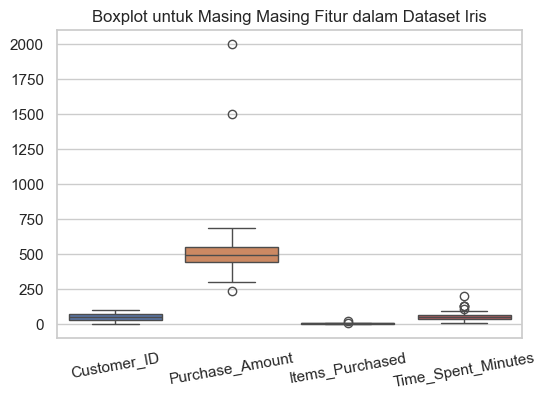

In [17]:
# 3. Buat diagram box plot untuk setiap kolom tersebut, dengan menyoroti nilai outlier.  

plt.figure(figsize=(6,4))
sns.boxplot(data= transactions)
plt.xticks(rotation=10)
plt.title("Boxplot untuk Masing Masing Fitur dalam Dataset Iris")
plt.show()

In [18]:
# 4. Hitung persentase data yang merupakan outlier untuk setiap kolom.
outlier_percentage = {
    'Purchase_Amount': (outliers_pa.sum() / len(transactions)) * 100,
    'Items_Purchased': (outliers_ip.sum() / len(transactions)) * 100,
    'Time_Spent_Minutes': (outliers_tsm.sum() / len(transactions)) * 100
}

print('persentase outlier')
for col, perc in outlier_percentage.items():
    print(f"{col}: {perc:.1f}%")

persentase outlier
Purchase_Amount: 2.0%
Items_Purchased: 1.0%
Time_Spent_Minutes: 1.0%


### Exercise 2.2: Treating Outliers
Sekarang, mari tangani outlier ini dengan metode yang berbeda

**Tasks:**
**Tugas:**  
1. Buat tiga salinan dari dataframe transaksi:  
   - Pada salinan pertama, hapus semua baris yang mengandung outlier.  
   - Pada salinan kedua, batasi nilai outlier pada ambang batas (winsorization).  
   - Pada salinan ketiga, ganti nilai outlier dengan median dari kolom tersebut.  
2. Hitung statistik ringkasan untuk setiap versi dataset.  
3. Buat visualisasi yang membandingkan distribusi setiap kolom di antara ketiga metode tersebut.  
4. Diskusikan dalam 3-4 kalimat metode mana yang paling sesuai untuk dataset ini dan alasan di baliknya.

In [19]:
# Your code here

# 1. Buat tiga salinan dari dataframe transaksi:  
#    - Pada salinan pertama, hapus semua baris yang mengandung outlier.  
#    - Pada salinan kedua, batasi nilai outlier pada ambang batas (winsorization).  
#    - Pada salinan ketiga, ganti nilai outlier dengan median dari kolom tersebut. 

def z_score(df, column):
    mean = df[column].mean() 
    std = df[column].std() 
    z_score = (df[column] - mean) / std 
    return z_score

def winsorize(df, column):
    mean = df[column].mean() 
    std = df[column].std() 
    df[column] = np.clip(df[column], mean - 3*std, mean + 3*std) 
    return df

def replace_outliers_with_median(df, column):
    median = df[column].median() #nyari median
    z_score = (df[column] - df[column].mean()) / df[column].std() 
    df[column] = np.where((z_score > 3) | (z_score < -3), median, df[column]) 
    return df

df_remove = transactions.copy()
df_remove = df_remove[(z_score(df_remove, 'Purchase_Amount') > -3) & (z_score(df_remove, 'Purchase_Amount') < 3)]
df_remove = df_remove[(z_score(df_remove, 'Items_Purchased') > -3) & (z_score(df_remove, 'Items_Purchased') < 3)]
df_remove = df_remove[(z_score(df_remove, 'Time_Spent_Minutes') > -3) & (z_score(df_remove, 'Time_Spent_Minutes') < 3)]

df_winsorized = transactions.copy()
df_winsorized = winsorize(df_winsorized, 'Purchase_Amount')
df_winsorized = winsorize(df_winsorized, 'Items_Purchased')
df_winsorized = winsorize(df_winsorized, 'Time_Spent_Minutes')

df_median = transactions.copy()
df_median = replace_outliers_with_median(df_median, 'Purchase_Amount')
df_median = replace_outliers_with_median(df_median, 'Items_Purchased')
df_median = replace_outliers_with_median(df_median, 'Time_Spent_Minutes')

print('\nremoved row')
print(df_remove)

print('\nwinsorized')
print(df_winsorized)

print('\nmedian')
print(df_median)


removed row
    Customer_ID  Purchase_Amount  Items_Purchased  Time_Spent_Minutes
0             1       549.671415                3           50.430103
1             2       486.173570                8           48.624556
2             3       564.768854                2           58.023511
3             4       652.302986                3           89.800628
4             5       476.584663                5           34.965790
..          ...              ...              ...                 ...
95           96       353.648505                5           59.632278
96           97       529.612028                4           37.247879
97           98       526.105527                3           59.000444
98           99       500.511346                3           91.157589
99          100       476.541287                7           89.478853

[96 rows x 4 columns]

winsorized
    Customer_ID  Purchase_Amount  Items_Purchased  Time_Spent_Minutes
0             1       549.671415          

In [20]:
# 2. Hitung statistik ringkasan untuk setiap versi dataset. 

print('\nremoved row')
print(df_remove.describe())

print('\nwinsorized')
print(df_winsorized.describe())

print('\nmedian')
print(df_median.describe())


removed row
       Customer_ID  Purchase_Amount  Items_Purchased  Time_Spent_Minutes
count    96.000000        96.000000        96.000000           96.000000
mean     50.895833       489.578118         4.791667           52.621143
std      29.190654        92.267047         2.284578           24.808022
min       1.000000       238.025490         1.000000            9.567461
25%      25.750000       438.824104         3.000000           35.686541
50%      51.000000       487.304371         5.000000           50.031542
75%      76.250000       550.085247         6.000000           63.307404
max     100.000000       685.227818        11.000000          130.236665

winsorized
       Customer_ID  Purchase_Amount  Items_Purchased  Time_Spent_Minutes
count   100.000000       100.000000       100.000000          100.000000
mean     50.500000       502.188876         4.952333           53.414877
std      29.011492       126.996191         2.484348           25.922087
min       1.000000       2

In [21]:
print(transactions['Purchase_Amount'].max())
print(transactions['Purchase_Amount'].min())
print(transactions['Items_Purchased'].max())
print(transactions['Items_Purchased'].min())
print(transactions['Time_Spent_Minutes'].max())
print(transactions['Time_Spent_Minutes'].min())

2000.0
238.02548959102558
25
1
200.0
9.567461189153798


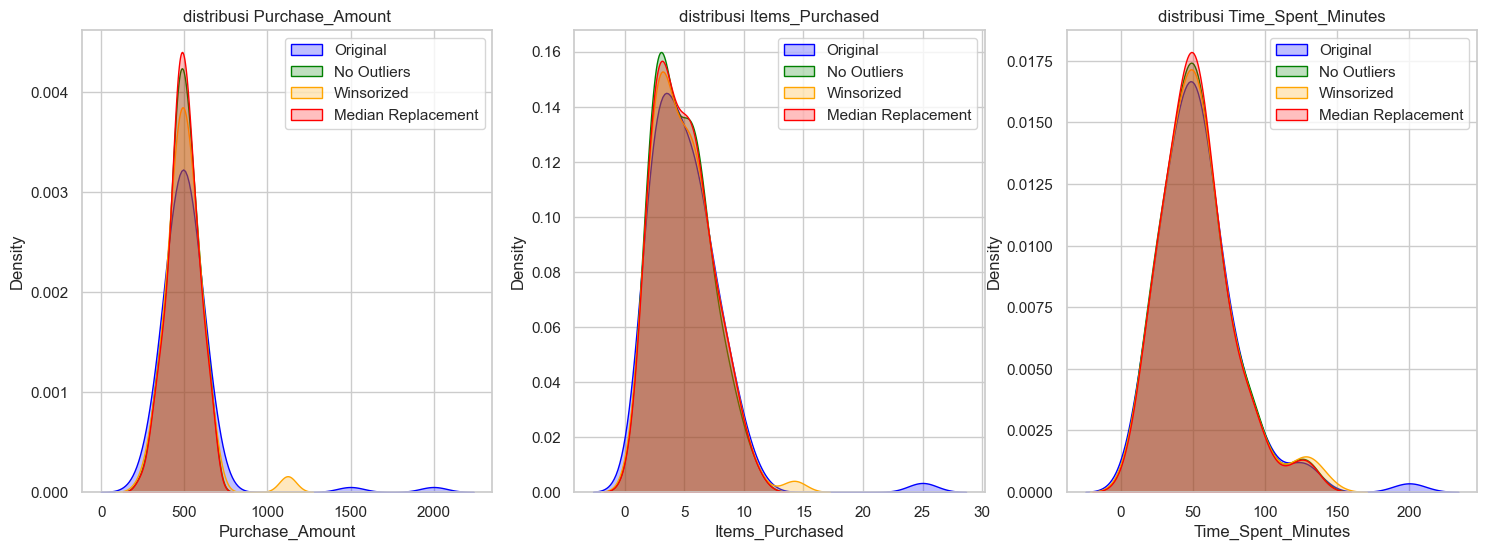

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.kdeplot(transactions['Purchase_Amount'], label='Original', color='blue', shade=True)
sns.kdeplot(df_remove['Purchase_Amount'], label='No Outliers', color='green', shade=True)
sns.kdeplot(df_winsorized['Purchase_Amount'], label='Winsorized', color='orange', shade=True)
sns.kdeplot(df_median['Purchase_Amount'], label='Median Replacement', color='red', shade=True)
plt.title('distribusi Purchase_Amount')
plt.legend()

plt.subplot(1, 3, 2)
sns.kdeplot(transactions['Items_Purchased'], label='Original', color='blue', shade=True)
sns.kdeplot(df_remove['Items_Purchased'], label='No Outliers', color='green', shade=True)
sns.kdeplot(df_winsorized['Items_Purchased'], label='Winsorized', color='orange', shade=True)
sns.kdeplot(df_median['Items_Purchased'], label='Median Replacement', color='red', shade=True)
plt.title('distribusi Items_Purchased')
plt.legend()

plt.subplot(1, 3, 3)
sns.kdeplot(transactions['Time_Spent_Minutes'], label='Original', color='blue', shade=True)
sns.kdeplot(df_remove['Time_Spent_Minutes'], label='No Outliers', color='green', shade=True)
sns.kdeplot(df_winsorized['Time_Spent_Minutes'], label='Winsorized', color='orange', shade=True)
sns.kdeplot(df_median['Time_Spent_Minutes'], label='Median Replacement', color='red', shade=True)
plt.title('distribusi Time_Spent_Minutes')
plt.legend()

plt.show()


In [23]:
# 4. Diskusikan dalam 3-4 kalimat metode mana yang paling sesuai untuk dataset ini dan alasan di baliknya.
'''
Untuk menentukan metode yang paling sesuai untuk dataset ini, kita perlu mempertimbangkan beberapa faktor, salah satunya adalah
outlier tersebut natural outliers atau bukan. Jika outlier tersebut bukan natural outliers, maka kita dapat menggunakan metode
penghapusan outlier. Namun, jika outlier tersebut natural outliers, maka kita bisa menggunakan metode penggantian outlier dengan 
winsorization atau menggantinya dengan nilai median. Pada kasus dataset ini, lebih cocok menggunakan winsorization, dikarenakan 
mayoritas kolomnya itu memiliki natural outliers, winsarization sendiri juga kita mengubah data tetapi data yang kita ubah itu tidak 
terlalu jauh dari data aslinya sebelum diubah (tidak seperti menggantinya dengan median). 
'''

'\nUntuk menentukan metode yang paling sesuai untuk dataset ini, kita perlu mempertimbangkan beberapa faktor, salah satunya adalah\noutlier tersebut natural outliers atau bukan. Jika outlier tersebut bukan natural outliers, maka kita dapat menggunakan metode\npenghapusan outlier. Namun, jika outlier tersebut natural outliers, maka kita bisa menggunakan metode penggantian outlier dengan \nwinsorization atau menggantinya dengan nilai median. Pada kasus dataset ini, lebih cocok menggunakan winsorization, dikarenakan \nmayoritas kolomnya itu memiliki natural outliers, winsarization sendiri juga kita mengubah data tetapi data yang kita ubah itu tidak \nterlalu jauh dari data aslinya sebelum diubah (tidak seperti menggantinya dengan median). \n'

## Part 3: Data Encoding

### Exercise 3.1: Encoding Categorical Data
Dataset yang berisi informasi tentang produk.

In [24]:
# Create dataset
product_data = {
    'Product_ID': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008', 'P009', 'P010'],
    'Category': ['Electronics', 'Clothing', 'Home', 'Electronics', 'Food', 'Clothing', 'Home', 'Food', 'Electronics', 'Clothing'],
    'Quality_Rating': ['High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'High'],
    'Shipping': ['Express', 'Standard', 'Express', 'Express', 'Standard', 'Express', 'Standard', 'Standard', 'Express', 'Standard'],
    'Price': [1200, 89, 299, 850, 24, 120, 450, 35, 780, 75]
}

products = pd.DataFrame(product_data)
print("Products DataFrame:")
display(products)

Products DataFrame:


,Product_ID,Category,Quality_Rating,Shipping,Price
0,P001,Electronics,High,Express,1200
1,P002,Clothing,Medium,Standard,89
2,P003,Home,Low,Express,299
3,P004,Electronics,High,Express,850
4,P005,Food,Medium,Standard,24
5,P006,Clothing,High,Express,120
6,P007,Home,Medium,Standard,450
7,P008,Food,Low,Standard,35
8,P009,Electronics,Medium,Express,780
9,P010,Clothing,High,Standard,75


**Tasks:**
1. Terapkan label encoding pada kolom 'Shipping'.  
2. Terapkan one-hot encoding pada kolom 'Category'.  
3. Terapkan ordinal encoding pada kolom 'Quality_Rating' (Rendah < Sedang < Tinggi).  
4. Buat dataframe baru yang menggabungkan semua hasil encoding dengan tepat.  

In [25]:
# Your code here
df_encoded = products.copy()
df_encoded

le = LabelEncoder() 
df_encoded['Shipping'] = le.fit_transform(df_encoded['Shipping']) 

df_encoded = pd.get_dummies(df_encoded, columns=['Category'], dtype=int)

# Mapping kategori ordinal
quality_order = ['Low', 'Medium', 'High']

# Menggunakan OrdinalEncoder
oe = OrdinalEncoder(categories=[quality_order])
df_encoded['Quality_Rating'] = oe.fit_transform(df_encoded[['Quality_Rating']])

df_encoded

,Product_ID,Quality_Rating,Shipping,Price,Category_Clothing,Category_Electronics,Category_Food,Category_Home
0,P001,2.0,0,1200,0,1,0,0
1,P002,1.0,1,89,1,0,0,0
2,P003,0.0,0,299,0,0,0,1
3,P004,2.0,0,850,0,1,0,0
4,P005,1.0,1,24,0,0,1,0
5,P006,2.0,0,120,1,0,0,0
6,P007,1.0,1,450,0,0,0,1
7,P008,0.0,1,35,0,0,1,0
8,P009,1.0,0,780,0,1,0,0
9,P010,2.0,1,75,1,0,0,0


## Part 4: Feature Engineering and Scaling

### Exercise 4.1: Feature Scaling
Dataset yang berisi informasi tentang rumah-rumah.

In [26]:
# Generate dataset
np.random.seed(42)
n = 150
house_data = {
    'Size_sqft': np.random.normal(2000, 500, n).astype(int), ## sqft == square foot
    'Price': np.random.normal(300000, 75000, n).astype(int),
    'Distance_to_City_km': np.random.gamma(10, 2, n),
    'Age_years': np.random.poisson(25, n),
    'Rooms': np.random.poisson(4, n) + 1
}

houses = pd.DataFrame(house_data)
print("Houses DataFrame:")
display(houses.head())

# Basic statistics
print("\nBasic Statistics:")
display(houses.describe())

Houses DataFrame:


,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
0,2248,318786,14.623015,27,5
1,1930,325983,16.055000,23,4
2,2323,248998,19.203653,23,8
3,2761,317419,20.072120,24,5
4,1882,321980,22.938768,24,2



Basic Statistics:


,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1958.300000,305341.726667,20.070198,24.853333,5.020000
std,471.162574,76628.467488,6.149401,4.888538,1.950632
min,690.000000,56904.000000,8.905443,13.000000,1.000000
25%,1665.000000,248272.750000,15.642671,21.000000,4.000000
50%,1972.500000,310667.000000,19.237861,24.500000,5.000000
75%,2245.000000,350641.500000,23.147397,28.000000,6.000000
max,3231.000000,588954.000000,36.397080,36.000000,12.000000


**Tasks:**
1. Terapkan StandardScaler pada semua kolom numerik.  
2. Buat pair plot yang menunjukkan hubungan antara variabel sebelum dan sesudah scaling.  
3. Hitung matriks korelasi untuk data asli dan data yang telah di-scaling.  
4. Buat heatmap untuk memvisualisasikan kedua matriks korelasi.  
5. Jelaskan dalam 2-3 kalimat perbedaan yang Anda amati dan mengapa perbedaan tersebut terjadi (atau tidak terjadi).

In [27]:
# Your code here
# 1. Terapkan StandardScaler pada semua kolom numerik. 
numerical_features = ['Size_sqft', 'Price', 'Distance_to_City_km', 'Age_years', 'Rooms']

ss = StandardScaler()
houses_scaled = houses.copy()
houses_scaled[numerical_features] = ss.fit_transform(houses_scaled[numerical_features]) 

houses

,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
0,2248,318786,14.623015,27,5
1,1930,325983,16.055000,23,4
2,2323,248998,19.203653,23,8
3,2761,317419,20.072120,24,5
4,1882,321980,22.938768,24,2
...,...,...,...,...,...
145,2390,248031,15.815550,21,10
146,1381,367469,19.876785,20,5
147,1339,323047,18.381360,29,5
148,2260,360964,21.509532,23,8


In [28]:
houses_scaled

,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
0,0.616922,0.176035,-0.888775,0.440593,-0.010287
1,-0.060265,0.270271,-0.655129,-0.380388,-0.524659
2,0.776636,-0.737748,-0.141388,-0.380388,1.532828
3,1.709366,0.158136,0.000314,-0.175143,-0.010287
4,-0.162482,0.217857,0.468042,-0.175143,-1.553403
...,...,...,...,...,...
145,0.919314,-0.750409,-0.694198,-0.790879,2.561571
146,-1.229372,0.813476,-0.031558,-0.996124,-0.010287
147,-1.318812,0.231828,-0.275555,0.851084,-0.010287
148,0.642476,0.728301,0.234845,-0.380388,1.532828


<Figure size 1200x600 with 0 Axes>

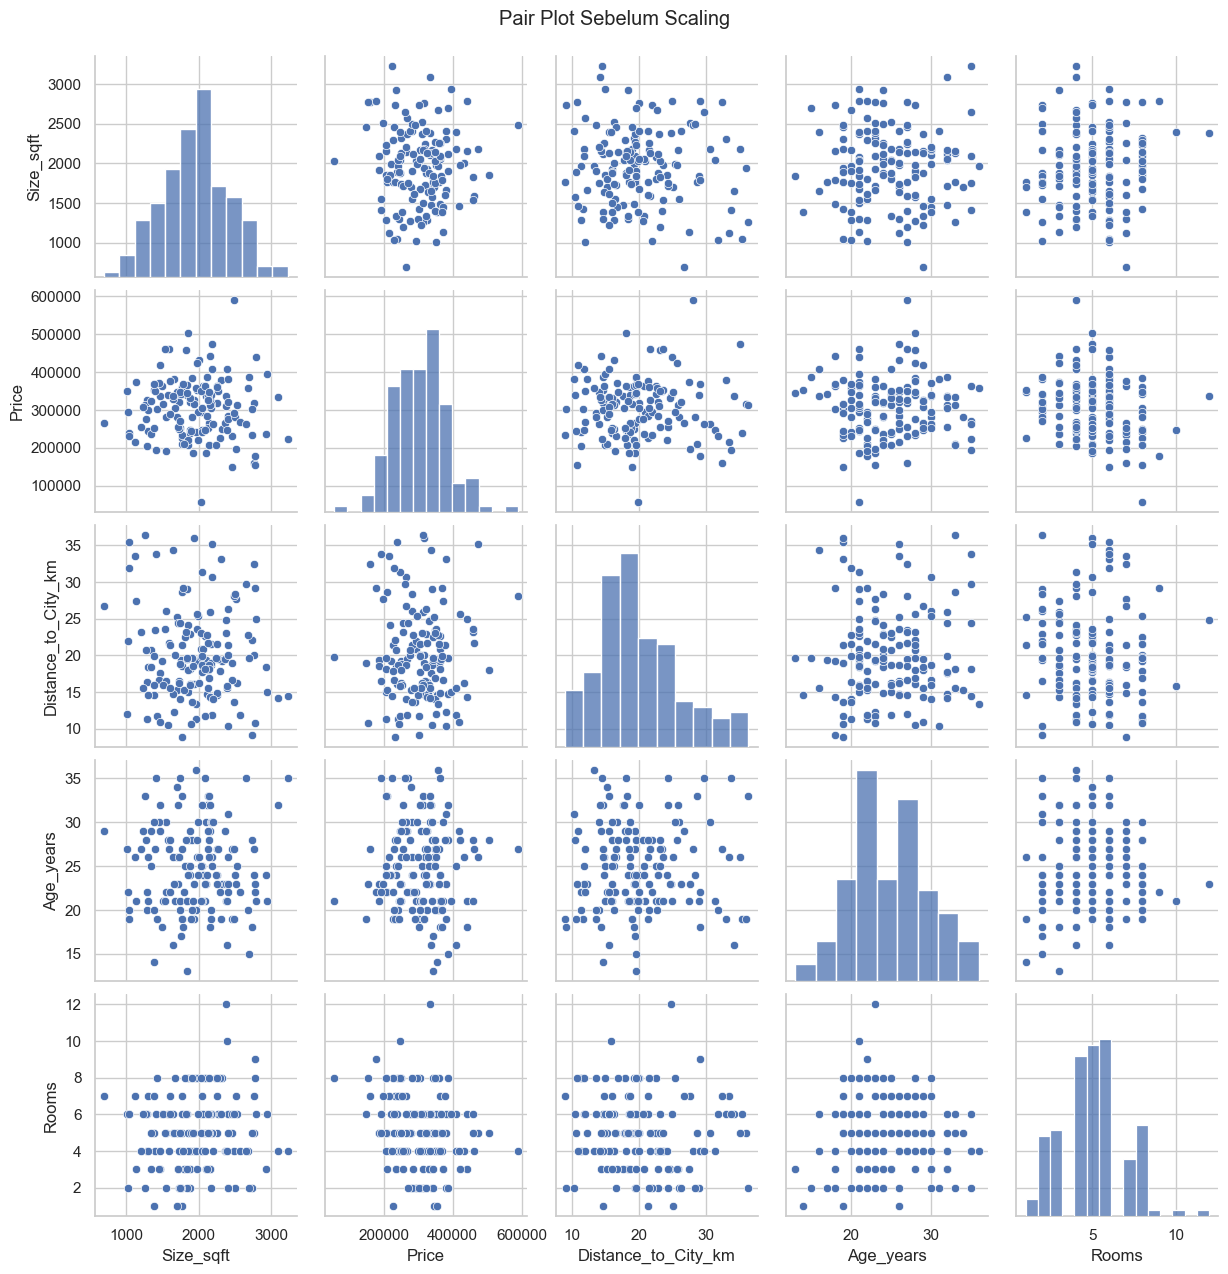

<Figure size 1200x600 with 0 Axes>

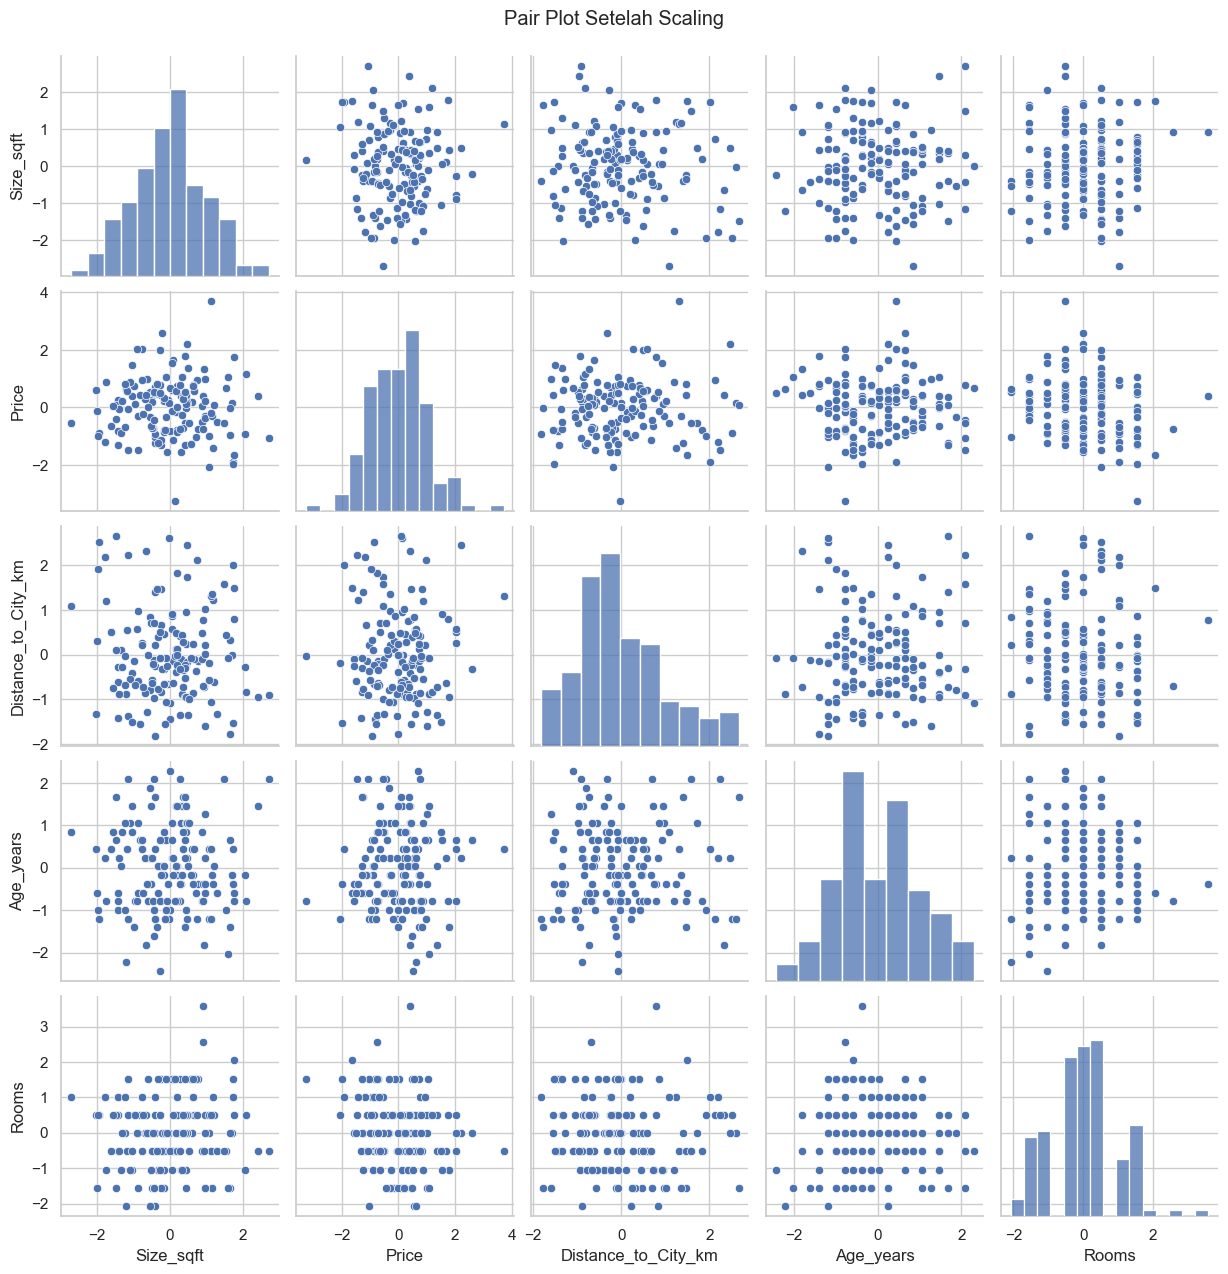

In [29]:
# 2. Buat pair plot yang menunjukkan hubungan antara variabel sebelum dan sesudah scaling.
plt.figure(figsize=(12, 6))
sns.pairplot(houses[numerical_features], palette="viridis") 
plt.suptitle('Pair Plot Sebelum Scaling', y=1.02)
plt.show()


plt.figure(figsize=(12, 6))
sns.pairplot(houses_scaled[numerical_features],  palette="viridis")
plt.suptitle('Pair Plot Setelah Scaling', y=1.02)
plt.show()

In [30]:
# 3. Hitung matriks korelasi untuk data asli dan data yang telah di-scaling.  
corr_original = houses[numerical_features].corr()
corr_scaled = houses_scaled[numerical_features].corr()

corr_original

,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
Size_sqft,1.000000,-0.023869,-0.089046,-0.000365,0.071659
Price,-0.023869,1.000000,-0.001374,-0.001669,-0.214957
Distance_to_City_km,-0.089046,-0.001374,1.000000,0.025599,-0.074118
Age_years,-0.000365,-0.001669,0.025599,1.000000,-0.072183
Rooms,0.071659,-0.214957,-0.074118,-0.072183,1.000000


In [31]:
corr_scaled

,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms
Size_sqft,1.000000,-0.023869,-0.089046,-0.000365,0.071659
Price,-0.023869,1.000000,-0.001374,-0.001669,-0.214957
Distance_to_City_km,-0.089046,-0.001374,1.000000,0.025599,-0.074118
Age_years,-0.000365,-0.001669,0.025599,1.000000,-0.072183
Rooms,0.071659,-0.214957,-0.074118,-0.072183,1.000000


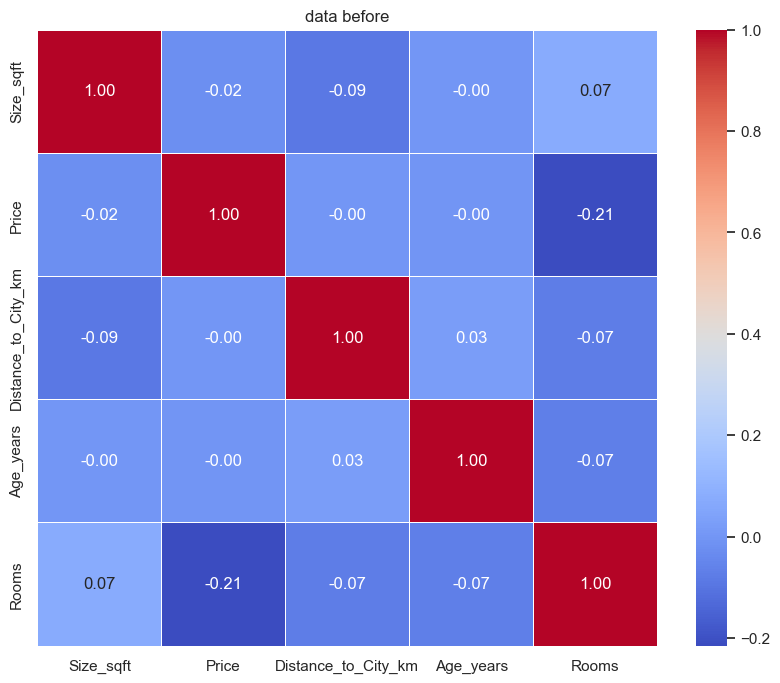

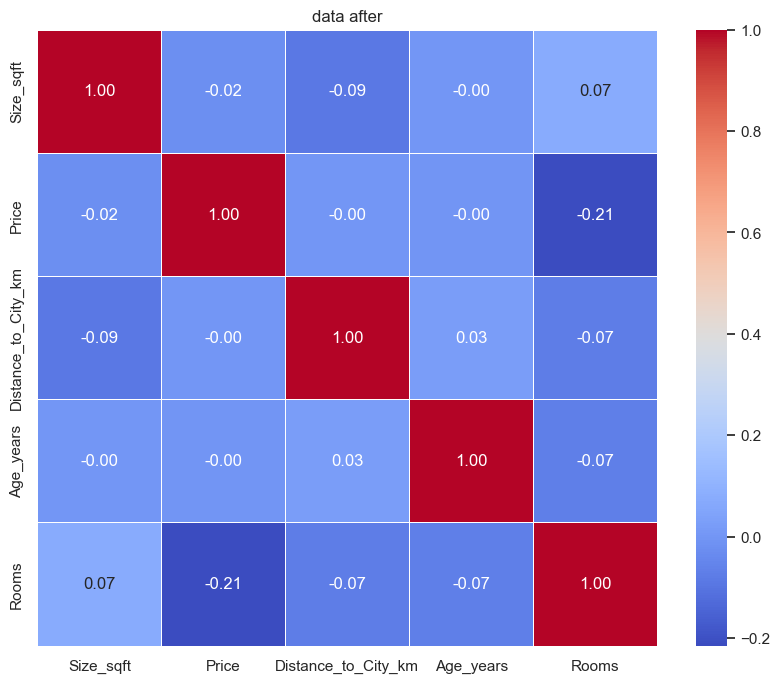

     Size_sqft   Price  Distance_to_City_km  Age_years  Rooms
0         2248  318786            14.623015         27      5
1         1930  325983            16.055000         23      4
2         2323  248998            19.203653         23      8
3         2761  317419            20.072120         24      5
4         1882  321980            22.938768         24      2
..         ...     ...                  ...        ...    ...
145       2390  248031            15.815550         21     10
146       1381  367469            19.876785         20      5
147       1339  323047            18.381360         29      5
148       2260  360964            21.509532         23      8
149       2148  347222            16.883609         28      8

[150 rows x 5 columns]


In [32]:
# 4. Buat heatmap untuk memvisualisasikan kedua matriks korelasi. 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_original, annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('data before')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_scaled, annot=True,cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('data after')
plt.show()

print(houses[numerical_features])

In [33]:
# 5. Jelaskan dalam 2-3 kalimat perbedaan yang Anda amati dan mengapa perbedaan tersebut terjadi (atau tidak terjadi).
'''
Your Analys here
Apakah Korelasi Berubah Setelah Scaling? Tidak

Meskipun StandardScaler mengubah skala data (mean = 0, standar deviasi = 1), 
hubungan antar variabel tidak berubah. Korelasi hanya bergantung pada hubungan linier antar variabel, 
bukan pada unit atau skala. Maka dari itu korelasi dari sebelum discaling dan setelah discaling tidak berubah
'''

'\nYour Analys here\nApakah Korelasi Berubah Setelah Scaling? Tidak\n\nMeskipun StandardScaler mengubah skala data (mean = 0, standar deviasi = 1), \nhubungan antar variabel tidak berubah. Korelasi hanya bergantung pada hubungan linier antar variabel, \nbukan pada unit atau skala. Maka dari itu korelasi dari sebelum discaling dan setelah discaling tidak berubah\n'

### Exercise 4.2: Feature Engineering
Sekarang, mari kita buat beberapa fitur baru yang mungkin dapat membantu dalam memprediksi harga rumah.

**Tasks:**  
1. Buat fitur baru berikut:  
   - Harga per meter persegi  
   - Kepadatan ruangan (jumlah ruangan per meter persegi)  
   - Kategori usia rumah (kelompokkan usia menjadi: Baru (0-5 tahun), Relatif Baru (6-15 tahun), Mapan (16-30 tahun), Tua (31+ tahun))  
   - Kategori jarak (kelompokkan jarak menjadi: Dekat (0-5 km), Sedang (6-15 km), Jauh (16+ km))  
2. Visualisasikan hubungan antara setiap fitur baru dengan harga rumah  
3. Hitung korelasi antara setiap fitur baru dengan harga rumah

In [34]:
# Your code here
# 1. Buat fitur baru berikut:  
#    - Harga per meter persegi  
#    - Kepadatan ruangan (jumlah ruangan per meter persegi)  
#    - Kategori usia rumah (kelompokkan usia menjadi: Baru (0-5 tahun), Relatif Baru (6-15 tahun), Mapan (16-30 tahun), Tua (31+ tahun))  
#    - Kategori jarak (kelompokkan jarak menjadi: Dekat (0-5 km), Sedang (6-15 km), Jauh (16+ km)) 

df = houses.copy()
df['Price_per_m2'] = df['Price'] / df['Size_sqft']
df['Room_density'] = df['Rooms'] / df['Size_sqft']
df['Age_categories'] = pd.cut(df['Age_years'], bins=[0, 5, 15, 30, np.inf], labels=['Baru', 'Relatif Baru', 'Mapan', 'Tua'])
df['Distance_categories'] = pd.cut(df['Distance_to_City_km'], bins=[0, 5, 15, np.inf], labels=['Dekat', 'Sedang', 'Jauh'])
df

,Size_sqft,Price,Distance_to_City_km,Age_years,Rooms,Price_per_m2,Room_density,Age_categories,Distance_categories
0,2248,318786,14.623015,27,5,141.808719,0.002224,Mapan,Sedang
1,1930,325983,16.055000,23,4,168.903109,0.002073,Mapan,Jauh
2,2323,248998,19.203653,23,8,107.188119,0.003444,Mapan,Jauh
3,2761,317419,20.072120,24,5,114.965230,0.001811,Mapan,Jauh
4,1882,321980,22.938768,24,2,171.083953,0.001063,Mapan,Jauh
...,...,...,...,...,...,...,...,...,...
145,2390,248031,15.815550,21,10,103.778661,0.004184,Mapan,Jauh
146,1381,367469,19.876785,20,5,266.089066,0.003621,Mapan,Jauh
147,1339,323047,18.381360,29,5,241.259895,0.003734,Mapan,Jauh
148,2260,360964,21.509532,23,8,159.718584,0.003540,Mapan,Jauh


<function matplotlib.pyplot.show(close=None, block=None)>

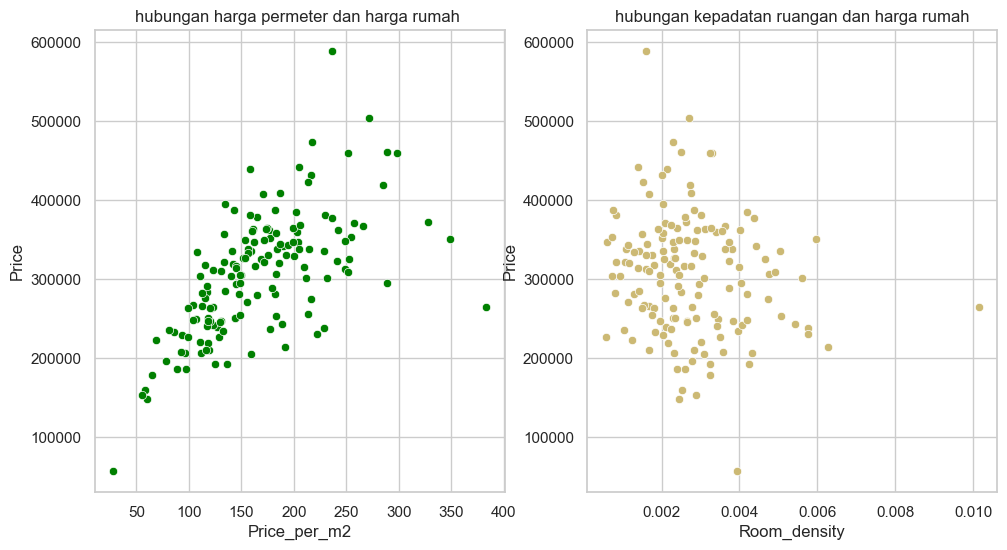

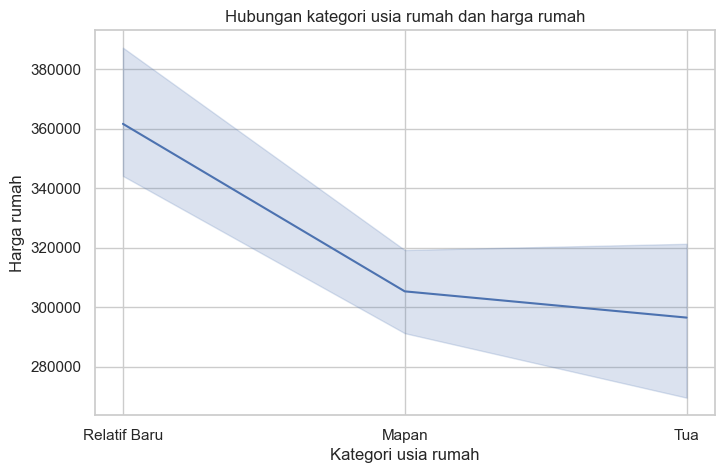

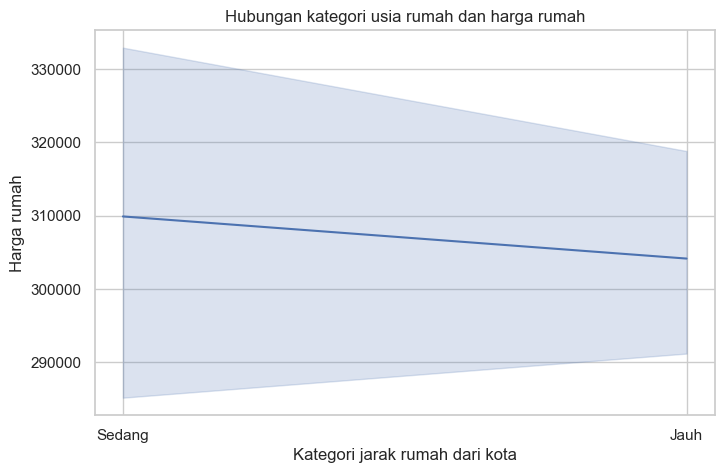

In [35]:
# 2. Visualisasikan hubungan antara setiap fitur baru dengan harga rumah  
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='Price_per_m2', y='Price', color='green')
plt.title('hubungan harga permeter dan harga rumah ')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='Room_density', y='Price', color='y')
plt.title('hubungan kepadatan ruangan dan harga rumah')

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Age_categories', y='Price', palette='Blues')

plt.title('Hubungan kategori usia rumah dan harga rumah')
plt.xlabel('Kategori usia rumah')
plt.ylabel('Harga rumah')

plt.show

plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='Distance_categories', y='Price')

plt.title('Hubungan kategori usia rumah dan harga rumah')
plt.xlabel('Kategori jarak rumah dari kota')
plt.ylabel('Harga rumah')

plt.show

In [36]:
# 3. Hitung korelasi antara setiap fitur baru dengan harga rumah
correlations = df[['Price', 'Price_per_m2', 'Room_density', 'Age_years', 'Distance_to_City_km']].corr()
correlations

,Price,Price_per_m2,Room_density,Age_years,Distance_to_City_km
Price,1.000000,0.629742,-0.173005,-0.001669,-0.001374
Price_per_m2,0.629742,1.000000,0.334485,0.009338,0.074454
Room_density,-0.173005,0.334485,1.000000,-0.036915,0.019842
Age_years,-0.001669,0.009338,-0.036915,1.000000,0.025599
Distance_to_City_km,-0.001374,0.074454,0.019842,0.025599,1.000000


## Submission Instructions
1. Pastikan Anda telah menyelesaikan semua bagian tugas.  
2. Simpan notebook dengan format nama file: `DataPrep_Assignment_Nama.ipynb`.  
3. Kirimkan melalui link form yang telah disediakan paling lambat 8 Maret 2025.  
4. Tambahkan catatan dalam sel teks di bawah ini.(optional)

[Your notes here]